In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import mne
from scipy.fftpack import fft

In [2]:
data_path = "../data/eeg_recordings/pilot_data/time_skip/"

In [3]:
eeg5 = pd.read_csv(data_path + 'pilot_eeg5.csv',names=('time','ch1','ch2','ch3','ch4','ch5','ch6','ch7','ch8'))
eeg5 = eeg5.iloc[1:, :].astype(float)
eeg5_plot = eeg5.iloc[:, :].melt('time', var_name='cols',value_name='vals')
eeg4 = pd.read_csv(data_path + 'pilot_eeg4.csv',names=('time','ch1','ch2','ch3','ch4','ch5','ch6','ch7','ch8'))
eeg4 = eeg4.iloc[1:, :].astype(float)
eeg4_plot = eeg4.iloc[:, :].melt('time', var_name='cols',value_name='vals')
eeg1 = pd.read_csv(data_path + 'pilot_eeg1.csv',names=('time','ch1','ch2','ch3','ch4','ch5','ch6','ch7','ch8'))
eeg1 = eeg1.iloc[1:, :].astype(float)
eeg1_plot = eeg1.iloc[:, :].melt('time', var_name='cols',value_name='vals')

## There seem to be time jumps in the recorded data:

<AxesSubplot:xlabel='time', ylabel='vals'>

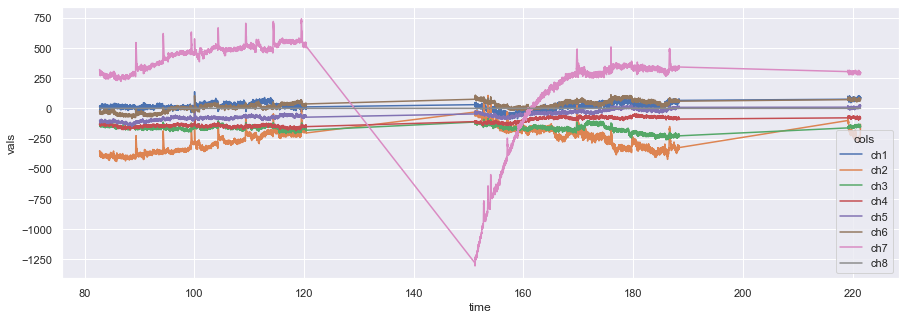

In [4]:
plt.figure(figsize=(15,5))
sns.lineplot(x='time',y='vals',hue='cols',data=eeg5_plot)

<AxesSubplot:xlabel='time', ylabel='vals'>

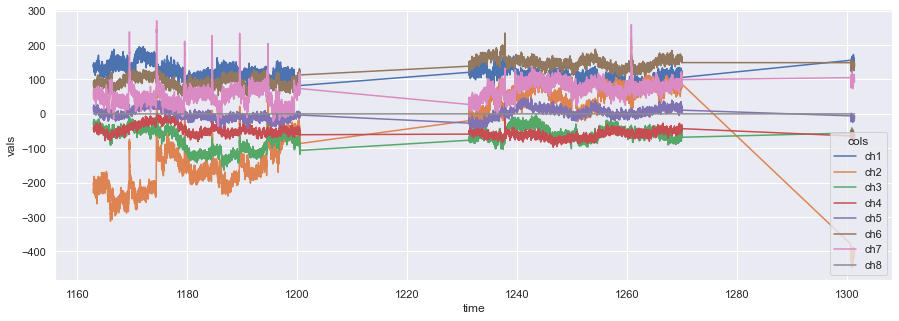

In [5]:
plt.figure(figsize=(15,5))
sns.lineplot(x='time',y='vals',hue='cols',data=eeg4_plot)

<AxesSubplot:xlabel='time', ylabel='vals'>

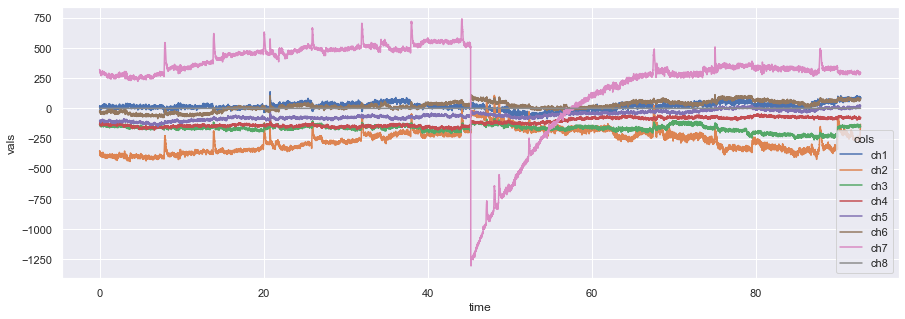

In [6]:
# eeg5.head()
# eeg5['time'].shape[0]
np.linspace(0,eeg5['time'].shape[0]/250,eeg5['time'].shape[0])
eeg5_fake_time = eeg5
eeg5_fake_time['time'] = np.linspace(0,eeg5['time'].shape[0]/250,eeg5['time'].shape[0])
eeg5_fake_time_plot = eeg5_fake_time.melt('time', var_name='cols',value_name='vals')
plt.figure(figsize=(15,5))
sns.lineplot(x='time',y='vals',hue='cols',data=eeg5_fake_time_plot)

In [7]:
eeg5['time'].shape[0]/250

92.736

In [8]:
5*26

130

## Data Using DSI API

In [9]:
data_path = "../data/eeg_recordings/pilot_data/"
# eeg12 = pd.read_csv(data_path + 'pilot_eeg12.csv',names=('time','ch1','ch2','ch3','ch4','ch5','ch6','ch7','ch8'))
eeg12 = pd.read_csv(data_path + 'pilot_eeg12.csv')
eeg12 = eeg12.iloc[1:, :].astype(float)
eeg12_plot = eeg12.iloc[:, :].melt('time', var_name='cols',value_name='vals')
eeg11 = pd.read_csv(data_path + 'pilot_eeg11.csv')
eeg11 = eeg11.iloc[1:, :].astype(float)
eeg11_plot = eeg11.iloc[:, :].melt('time', var_name='cols',value_name='vals')
eeg10 = pd.read_csv(data_path + 'pilot_eeg10.csv')
eeg10 = eeg10.iloc[1:, :].astype(float)
eeg10_plot = eeg10.iloc[:, :].melt('time', var_name='cols',value_name='vals')

### Plots

<AxesSubplot:xlabel='time', ylabel='vals'>

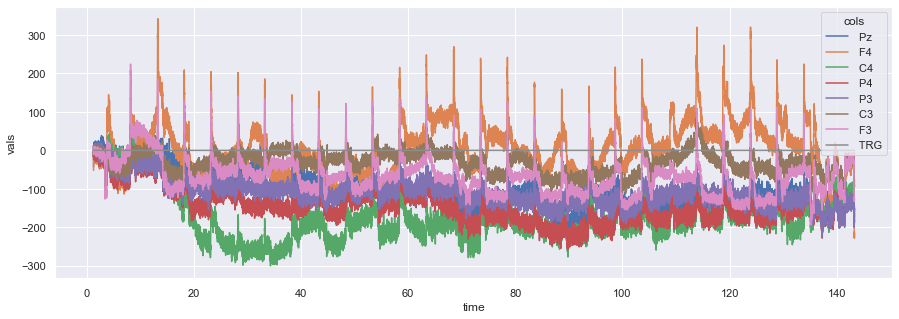

In [10]:
plt.figure(figsize=(15,5))
sns.lineplot(x='time',y='vals',hue='cols',data=eeg12_plot)

<AxesSubplot:xlabel='time', ylabel='vals'>

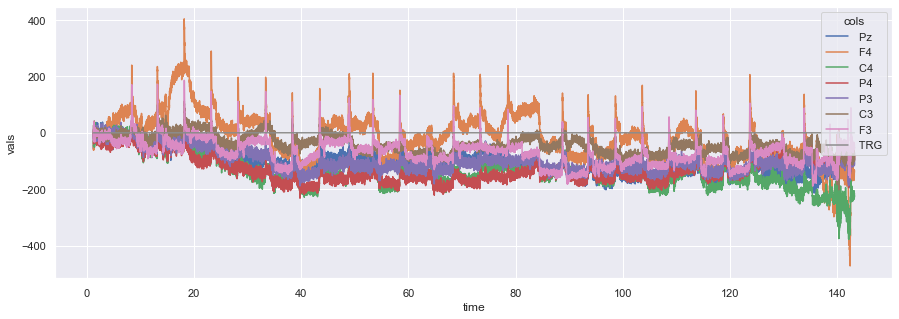

In [11]:
plt.figure(figsize=(15,5))
sns.lineplot(x='time',y='vals',hue='cols',data=eeg11_plot)

<AxesSubplot:xlabel='time', ylabel='vals'>

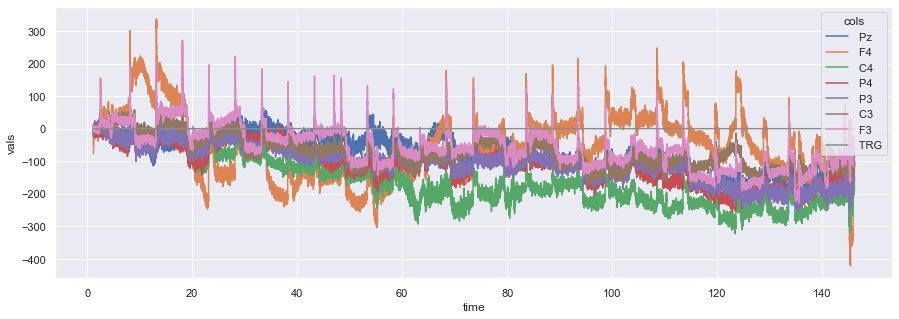

In [12]:
plt.figure(figsize=(15,5))
sns.lineplot(x='time',y='vals',hue='cols',data=eeg10_plot)

### Preprocessing

In [13]:
# 32.704s is when the recording starts, it takes eeg12['time'].iloc[0]s for the eeg to show up(which would be changed to 0.00s)
# 34.951s is when the first trial starts. So first_trial_start_time is the start time of the first trial in the eeg12 dataframe
# Note: this should only be run once or first_trial_start_time wouldn't be correct
first_trial_start_time = 34.951 - 32.704 - eeg12['time'].iloc[0]
eeg12['time'] = eeg12['time'] - eeg12['time'].iloc[0]


In [14]:
first_trial_start_time

0.9492222222222222

In [15]:
eeg12 = eeg12.loc[eeg12['time']>first_trial_start_time]

In [16]:
eeg12 = eeg12.drop(columns=eeg12.keys()[-1])
eeg12['time'] = eeg12['time'] - eeg12['time'].iloc[0]

In [17]:
eeg12

,time,Pz,F4,C4,P4,P3,C3,F3
286,0.000000,-12.341,-28.334408,-14.755320,-23.175016,-15.943630,-7.818284,-4.796939
287,0.003333,-8.729,-11.746624,-11.143320,-23.174354,-11.731192,-6.015370,3.039734
288,0.006667,-3.612,-23.528320,-10.251380,-18.057354,-5.113096,-3.008971,0.310911
289,0.010000,-2.107,-29.869143,-12.971439,-16.552354,-0.005466,0.003601,-3.615812
290,0.013333,7.525,-22.349480,-8.168079,-9.327914,4.823027,2.399255,-0.320823
...,...,...,...,...,...,...,...,...
42595,141.030000,-168.259,-222.274473,-154.376661,-184.810969,-185.371495,-93.784942,-129.633410
42596,141.033333,-164.346,-212.024462,-154.990511,-182.101748,-181.758714,-90.776485,-127.832747
42597,141.036667,-167.356,-224.087335,-154.982611,-179.092851,-185.969591,-92.881942,-129.333935
42598,141.040000,-156.219,-227.133169,-158.935110,-173.974748,-172.430837,-85.061601,-131.474482


In [18]:
eeg12 = eeg12.loc[eeg12['time']<129.999]

In [19]:
# every 1500 samples is a trial (5s at 300Hz)
eeg12.iloc[:1500]

,time,Pz,F4,C4,P4,P3,C3,F3
286,0.000000,-12.341,-28.334408,-14.755320,-23.175016,-15.943630,-7.818284,-4.796939
287,0.003333,-8.729,-11.746624,-11.143320,-23.174354,-11.731192,-6.015370,3.039734
288,0.006667,-3.612,-23.528320,-10.251380,-18.057354,-5.113096,-3.008971,0.310911
289,0.010000,-2.107,-29.869143,-12.971439,-16.552354,-0.005466,0.003601,-3.615812
290,0.013333,7.525,-22.349480,-8.168079,-9.327914,4.823027,2.399255,-0.320823
...,...,...,...,...,...,...,...,...
1781,4.983333,-44.849,-82.871065,-24.930861,-82.166166,-62.561933,-53.592918,-29.459117
1782,4.986667,-46.956,-87.392164,-24.925332,-82.768441,-68.271564,-59.921119,-21.909719
1783,4.990000,-49.063,-84.670966,-21.600112,-79.157489,-68.577249,-52.681173,-18.886758
1784,4.993333,-40.936,-84.088026,-17.396382,-72.535213,-61.651125,-49.679918,-19.209106


In [20]:
# MNE doesn't work with pandas dataframe so it should be converted into np array
time_array = eeg12['time']
eeg12 = eeg12.to_numpy()[:,1:].T # drop out the time (7,39000)
eeg12 = mne.filter.filter_data(eeg12, sfreq=300, l_freq=9, h_freq=49, verbose=0, method='fir') # bandpass filter

In [21]:
eeg12.shape

(7, 39000)

<AxesSubplot:xlabel='time', ylabel='vals'>

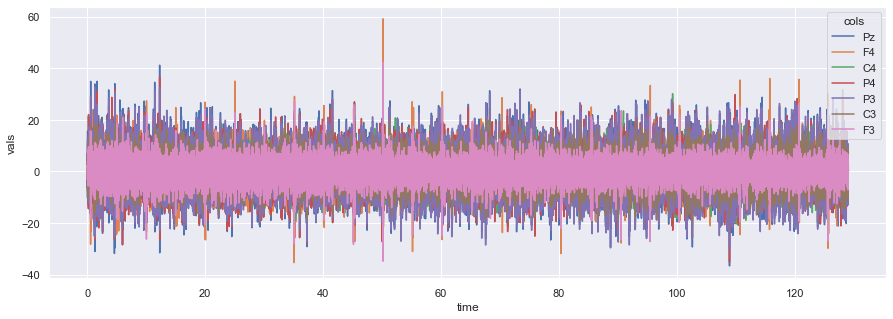

In [22]:
eeg12 = pd.DataFrame(eeg12.T, columns = ['Pz', 'F4', 'C4', 'P4', 'P3', 'C3', 'F3'])
eeg12['time'] = time_array
eeg12_plot = eeg12.iloc[:, :].melt('time', var_name='cols',value_name='vals')
plt.figure(figsize=(15,5))
sns.lineplot(x='time',y='vals',hue='cols',data=eeg12_plot)

In [23]:
eeg12 = eeg12.drop(columns='time')
eeg12 = eeg12.to_numpy().T.reshape(7,26,1500).transpose(1,0,2) # back to numpy and epoch (26,7,1500)

### Plot Single trial FFT

In [24]:
eeg12.shape

(26, 7, 1500)

In [25]:
# FFT, Frequency-domain analysis
freqs = np.linspace(0.0, 300 / 2, 750)
psd12 = 2/750*np.abs(fft(eeg12)[:,:,:750])
psd12.shape,freqs.shape

((26, 7, 750), (750,))

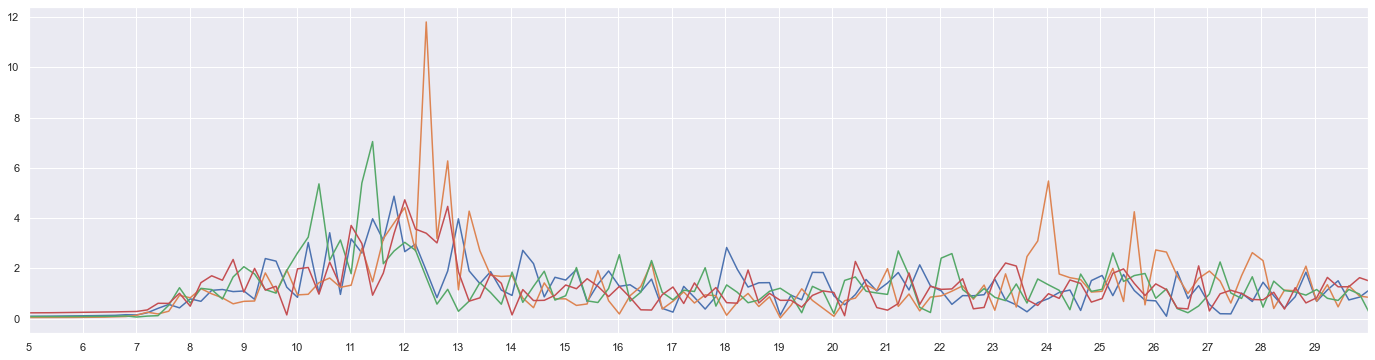

In [26]:
# R, B, U, X, E, D, A, G, P, M, W, J, F, V, N, C, L, Q, K, Z, O, I, Y, T, S, H
# 6, 1, 15, 5, 4, 12, 7, 25, 21, 11, 18, 16, 9, 14, 20, 8, 17, 0, 24, 23, 2, 13, 10, 3, 22, 19
plt.figure(figsize=(24, 6))
ax = plt.subplot()
ax.set_xlim(5, 30)
sns.lineplot(x=freqs, y=psd12[6,0,:], ax=ax)
sns.lineplot(x=freqs, y=psd12[1,0,:], ax=ax)
sns.lineplot(x=freqs, y=psd12[15,0,:], ax=ax)
sns.lineplot(x=freqs, y=psd12[5,0,:], ax=ax)
# sns.lineplot(x=freqs, y=psd12[4,0,:], ax=ax)
# sns.lineplot(x=freqs, y=psd12[5,0,:], ax=ax)
plt.xticks(range(5,30));
# for i in range(20,24):
#     sns.lineplot(x=freqs, y=psd12[i,0,:], ax=ax)

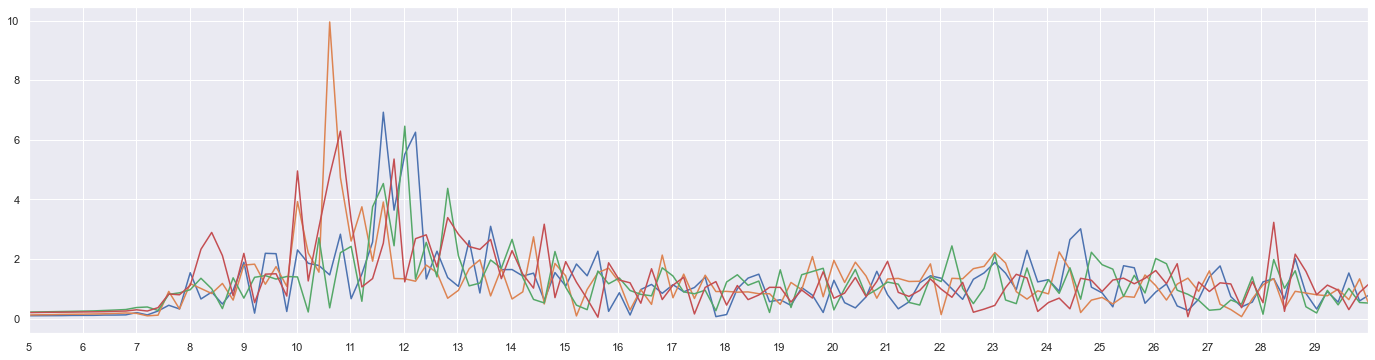

In [27]:
plt.figure(figsize=(24, 6))
ax = plt.subplot()
ax.set_xlim(5, 30)
sns.lineplot(x=freqs, y=psd12[4,0,:], ax=ax)
sns.lineplot(x=freqs, y=psd12[12,0,:], ax=ax)
sns.lineplot(x=freqs, y=psd12[7,0,:], ax=ax)
sns.lineplot(x=freqs, y=psd12[25,0,:], ax=ax)
plt.xticks(range(5,30));

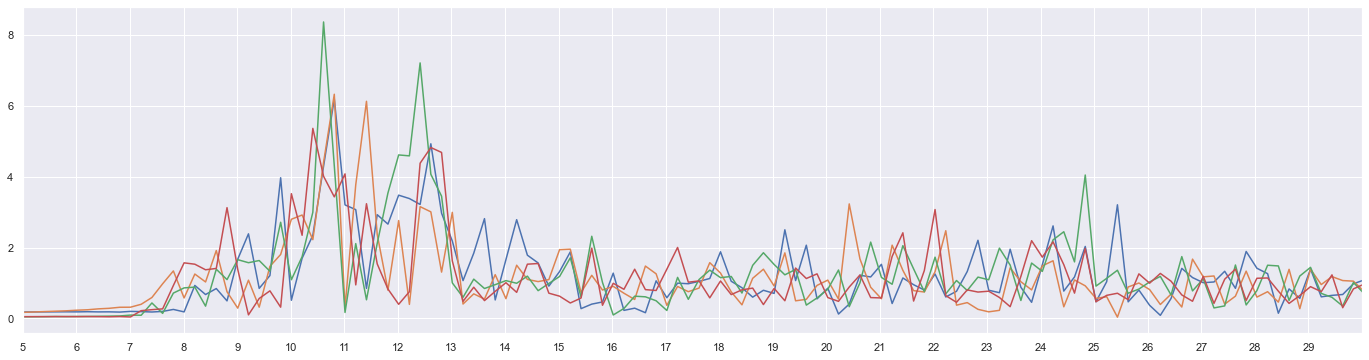

In [28]:
plt.figure(figsize=(24, 6))
ax = plt.subplot()
ax.set_xlim(5, 30)
sns.lineplot(x=freqs, y=psd12[21,0,:], ax=ax)
sns.lineplot(x=freqs, y=psd12[11,0,:], ax=ax)
sns.lineplot(x=freqs, y=psd12[18,0,:], ax=ax)
sns.lineplot(x=freqs, y=psd12[16,0,:], ax=ax)
plt.xticks(range(5,30));

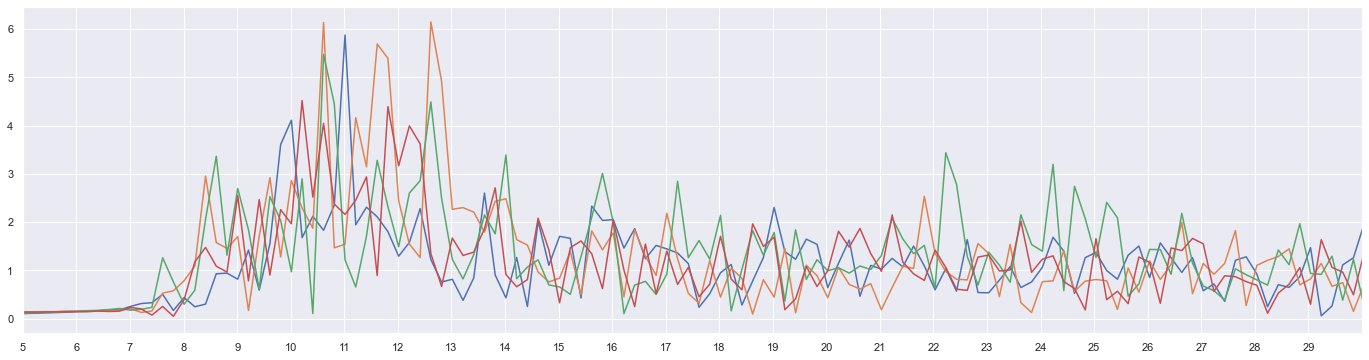

In [29]:
# 9, 14, 20, 8
plt.figure(figsize=(24, 6))
ax = plt.subplot()
ax.set_xlim(5, 30)
sns.lineplot(x=freqs, y=psd12[9,0,:], ax=ax)
sns.lineplot(x=freqs, y=psd12[14,0,:], ax=ax)
sns.lineplot(x=freqs, y=psd12[20,0,:], ax=ax)
sns.lineplot(x=freqs, y=psd12[8,0,:], ax=ax)
plt.xticks(range(5,30));

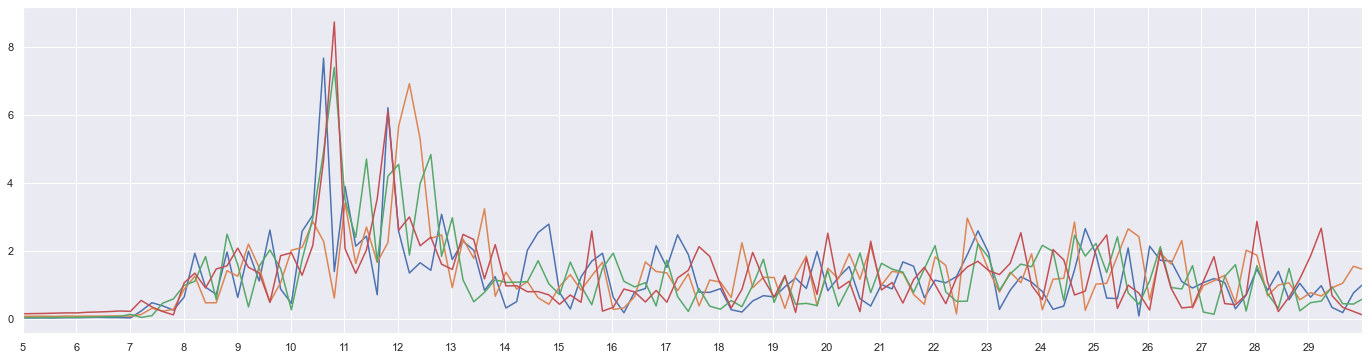

In [30]:
# 17, 0, 24, 23
plt.figure(figsize=(24, 6))
ax = plt.subplot()
ax.set_xlim(5, 30)
sns.lineplot(x=freqs, y=psd12[17,0,:], ax=ax)
sns.lineplot(x=freqs, y=psd12[0,0,:], ax=ax)
sns.lineplot(x=freqs, y=psd12[24,0,:], ax=ax)
sns.lineplot(x=freqs, y=psd12[23,0,:], ax=ax)
plt.xticks(range(5,30));

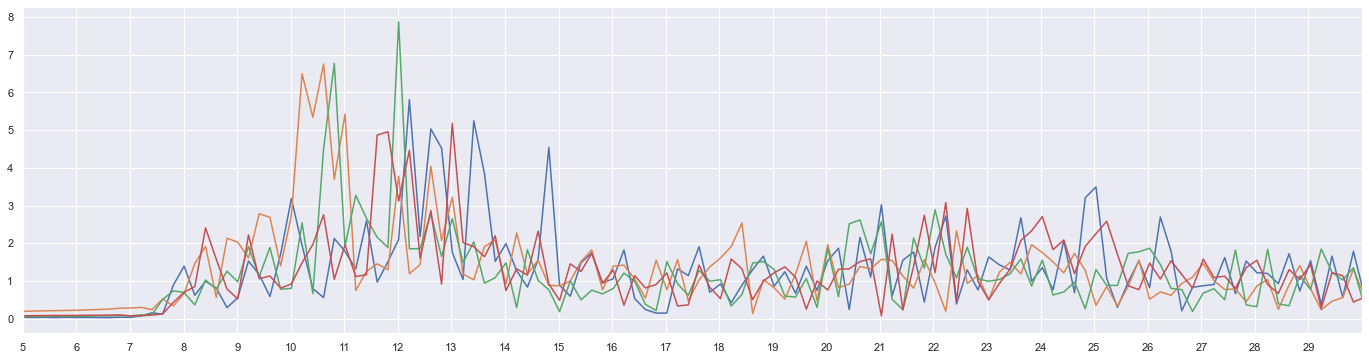

In [31]:
# 2, 13, 10, 3
plt.figure(figsize=(24, 6))
ax = plt.subplot()
ax.set_xlim(5, 30)
sns.lineplot(x=freqs, y=psd12[2,0,:], ax=ax)
sns.lineplot(x=freqs, y=psd12[13,0,:], ax=ax)
sns.lineplot(x=freqs, y=psd12[10,0,:], ax=ax)
sns.lineplot(x=freqs, y=psd12[3,0,:], ax=ax)
plt.xticks(range(5,30));

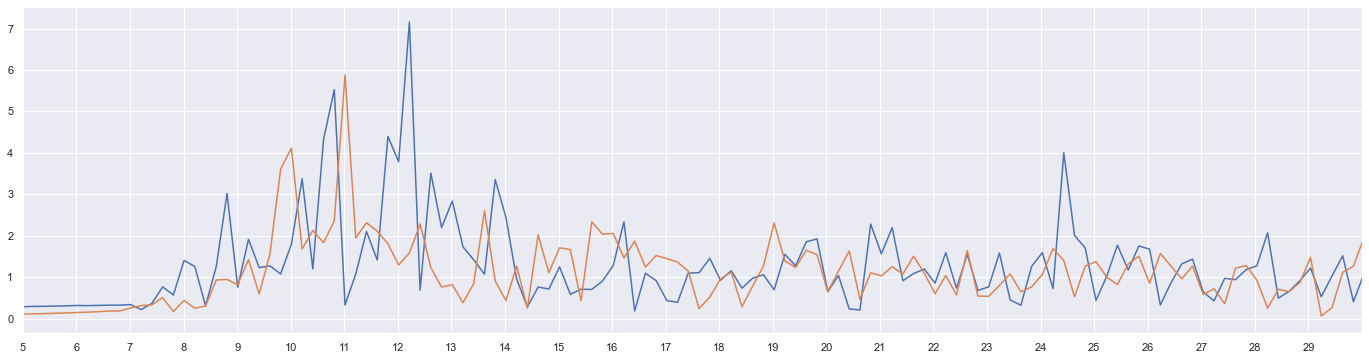

In [32]:
# 22, 19
plt.figure(figsize=(24, 6))
ax = plt.subplot()
ax.set_xlim(5, 30)
sns.lineplot(x=freqs, y=psd12[22,0,:], ax=ax)
sns.lineplot(x=freqs, y=psd12[9,0,:], ax=ax)
plt.xticks(range(5,30));

### multitrial average fft

In [33]:
# R, B, U, X, E, D, A, G, P, M, W, J, F, V, N, C, L, Q, K, Z, O, I, Y, T, S, H
# 6, 1, 15, 5, 4, 12, 7, 25, 21, 11, 18, 16, 9, 14, 20, 8, 17, 0, 24, 23, 2, 13, 10, 3, 22, 19
eeg12.shape

(26, 7, 1500)

In [34]:
# eeg12[[6, 1, 15, 5, 4, 12, 7, 25, 21, 11, 18, 16, 9, 14, 20, 8, 17, 0, 24, 23, 2, 13, 10, 3, 22, 19],:,:][0,:,:]
# eeg12[6,:,:]
eeg12 = eeg12[[6,1,15,5,4,12,7,25,21,11,18,16,9,14,20,8,17,0,24,23,2,13,10,3,22,19],:,:]

In [57]:
eeg6 = pd.read_csv(data_path + 'pilot_eeg6.csv').astype(float)
eeg7 = pd.read_csv(data_path + 'pilot_eeg7.csv').astype(float)
eeg8 = pd.read_csv(data_path + 'pilot_eeg8.csv').astype(float)
eeg9 = pd.read_csv(data_path + 'pilot_eeg9.csv').astype(float)
eeg10 = pd.read_csv(data_path + 'pilot_eeg10.csv').astype(float)
eeg11 = pd.read_csv(data_path + 'pilot_eeg11.csv').astype(float)
first_trial_start_time6 = 22.362 - 19.501 - eeg6['time'].iloc[0]
first_trial_start_time7 = 26.741 - 24.396 - eeg7['time'].iloc[0]
first_trial_start_time8 = 42.854 - 40.238 - eeg8['time'].iloc[0]
first_trial_start_time9 = 43.639 - 40.769 - eeg9['time'].iloc[0]
first_trial_start_time10 = 38.800 - 35.688 - eeg10['time'].iloc[0]
first_trial_start_time11 = 42.738 - 40.502 - eeg11['time'].iloc[0]
eeg6 = eeg6.loc[eeg6['time']>first_trial_start_time6]
eeg7 = eeg7.loc[eeg7['time']>first_trial_start_time7]
eeg8 = eeg8.loc[eeg8['time']>first_trial_start_time8]
eeg9 = eeg9.loc[eeg9['time']>first_trial_start_time9]
eeg10 = eeg10.loc[eeg10['time']>first_trial_start_time10]
eeg11 = eeg11.loc[eeg11['time']>first_trial_start_time11]
eeg6['time'] = eeg6['time'] - eeg6['time'].iloc[0]
eeg7['time'] = eeg7['time'] - eeg7['time'].iloc[0]
eeg8['time'] = eeg8['time'] - eeg8['time'].iloc[0]
eeg9['time'] = eeg9['time'] - eeg9['time'].iloc[0]
eeg10['time'] = eeg10['time'] - eeg10['time'].iloc[0]
eeg11['time'] = eeg11['time'] - eeg11['time'].iloc[0]
eeg6 = eeg6.loc[eeg6['time']<129.999]
eeg7 = eeg7.loc[eeg7['time']<129.999]
eeg8 = eeg8.loc[eeg8['time']<129.999]
eeg9 = eeg9.loc[eeg9['time']<129.999]
eeg10 = eeg10.loc[eeg10['time']<129.999]
eeg11 = eeg11.loc[eeg11['time']<129.999]
eeg6 = eeg6.drop(columns=['time',' TRG'])
eeg7 = eeg7.drop(columns=['time',' TRG'])
eeg8 = eeg8.drop(columns=['time',' TRG'])
eeg9 = eeg9.drop(columns=['time',' TRG'])
eeg10 = eeg10.drop(columns=['time',' TRG'])
eeg11 = eeg11.drop(columns=['time',' TRG'])
eeg6 = eeg6.to_numpy().T
eeg7 = eeg7.to_numpy().T
eeg8 = eeg8.to_numpy().T
eeg9 = eeg9.to_numpy().T
eeg10 = eeg10.to_numpy().T
eeg11 = eeg11.to_numpy().T
eeg6 = mne.filter.filter_data(eeg12, sfreq=300, l_freq=9, h_freq=49, verbose=0, method='fir')
eeg7 = mne.filter.filter_data(eeg12, sfreq=300, l_freq=9, h_freq=49, verbose=0, method='fir')
eeg8 = mne.filter.filter_data(eeg12, sfreq=300, l_freq=9, h_freq=49, verbose=0, method='fir')
eeg9 = mne.filter.filter_data(eeg12, sfreq=300, l_freq=9, h_freq=49, verbose=0, method='fir')
eeg10 = mne.filter.filter_data(eeg10, sfreq=300, l_freq=9, h_freq=49, verbose=0, method='fir')
eeg11 = mne.filter.filter_data(eeg11, sfreq=300, l_freq=9, h_freq=49, verbose=0, method='fir')
eeg6 = eeg6.reshape(7,26,1500).transpose(1,0,2)
eeg7 = eeg7.reshape(7,26,1500).transpose(1,0,2)
eeg8 = eeg8.reshape(7,26,1500).transpose(1,0,2)
eeg9 = eeg9.reshape(7,26,1500).transpose(1,0,2)
eeg10 = eeg10.reshape(7,26,1500).transpose(1,0,2)
eeg11 = eeg11.reshape(7,26,1500).transpose(1,0,2)

In [58]:
with open(data_path + 'pilot_trials6.txt') as f:
    trials6 = f.read()
with open(data_path + 'pilot_trials7.txt') as f:
    trials7 = f.read()
with open(data_path + 'pilot_trials8.txt') as f:
    trials8 = f.read()
with open(data_path + 'pilot_trials9.txt') as f:
    trials9 = f.read()
with open(data_path + 'pilot_trials10.txt') as f:
    trials10 = f.read()
with open(data_path + 'pilot_trials11.txt') as f:
    trials11 = f.read()
trials6 = [char for char in trials6] # split the string into characters
trials6 = [ord(char) for char in trials6] # convert char to ascii decimal
trials6 = [ascii_val - ord('A') for ascii_val in trials6] # subtract each ascii decimal by that of 'A'
trials7 = [char for char in trials7] 
trials7 = [ord(char) for char in trials7] 
trials7 = [ascii_val - ord('A') for ascii_val in trials7] 
trials8 = [char for char in trials8] 
trials8 = [ord(char) for char in trials8] 
trials8 = [ascii_val - ord('A') for ascii_val in trials8] 
trials9 = [char for char in trials9] 
trials9 = [ord(char) for char in trials9] 
trials9 = [ascii_val - ord('A') for ascii_val in trials9] 
trials10 = [char for char in trials10] 
trials10 = [ord(char) for char in trials10] 
trials10 = [ascii_val - ord('A') for ascii_val in trials10] 
trials11 = [char for char in trials11] 
trials11 = [ord(char) for char in trials11] 
trials11 = [ascii_val - ord('A') for ascii_val in trials11] 

In [59]:
eeg6 = eeg6[trials6,:,:]
eeg7 = eeg7[trials7,:,:]
eeg8 = eeg8[trials8,:,:]
eeg9 = eeg9[trials9,:,:]
eeg10 = eeg10[trials10,:,:]
eeg11 = eeg11[trials11,:,:]

In [60]:
eeg6.shape,eeg7.shape,eeg8.shape,eeg9.shape,eeg10.shape,eeg11.shape,eeg12.shape

((26, 7, 1500),
 (26, 7, 1500),
 (26, 7, 1500),
 (26, 7, 1500),
 (26, 7, 1500),
 (26, 7, 1500),
 (26, 7, 1500))

In [61]:
eeg = np.array([eeg6,eeg7,eeg8,eeg9,eeg10,eeg11,eeg12])
eeg.shape

(7, 26, 7, 1500)

In [62]:
eeg = eeg[:,:,:,300:] # skip the first second
eeg.shape

(7, 26, 7, 1200)

In [63]:
freqs = np.linspace(0.0, 300 / 2, 600)
psd = 2/600*np.abs(fft(eeg)[:,:,:,:600])
psd.shape,freqs.shape

((7, 26, 7, 600), (600,))

In [64]:
psd = psd.mean(axis=0) # take the mean psd across sessions
psd.shape

(26, 7, 600)

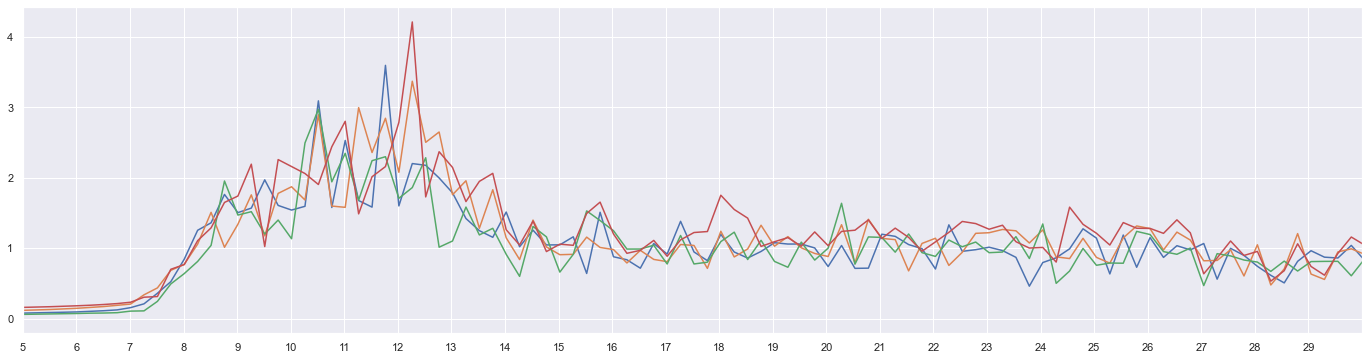

In [90]:
plt.figure(figsize=(24, 6))
ax = plt.subplot()
ax.set_xlim(5, 30)
sns.lineplot(x=freqs, y=psd[0,4,:], ax=ax)
sns.lineplot(x=freqs, y=psd[1,4,:], ax=ax)
sns.lineplot(x=freqs, y=psd[2,4,:], ax=ax)
sns.lineplot(x=freqs, y=psd[3,4,:], ax=ax)
plt.xticks(range(5,30));

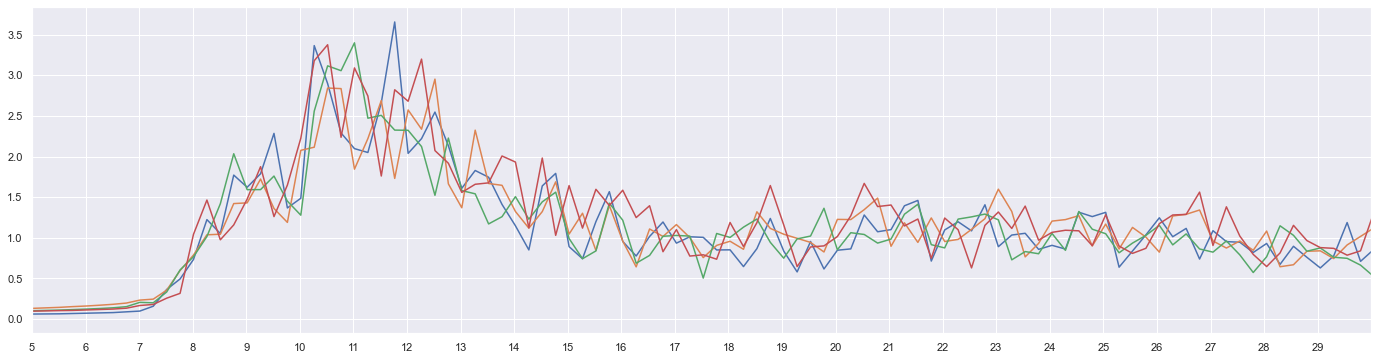

In [91]:
plt.figure(figsize=(24, 6))
ax = plt.subplot()
ax.set_xlim(5, 30)
sns.lineplot(x=freqs, y=psd[4,4,:], ax=ax)
sns.lineplot(x=freqs, y=psd[5,4,:], ax=ax)
sns.lineplot(x=freqs, y=psd[6,4,:], ax=ax)
sns.lineplot(x=freqs, y=psd[7,4,:], ax=ax)
plt.xticks(range(5,30));

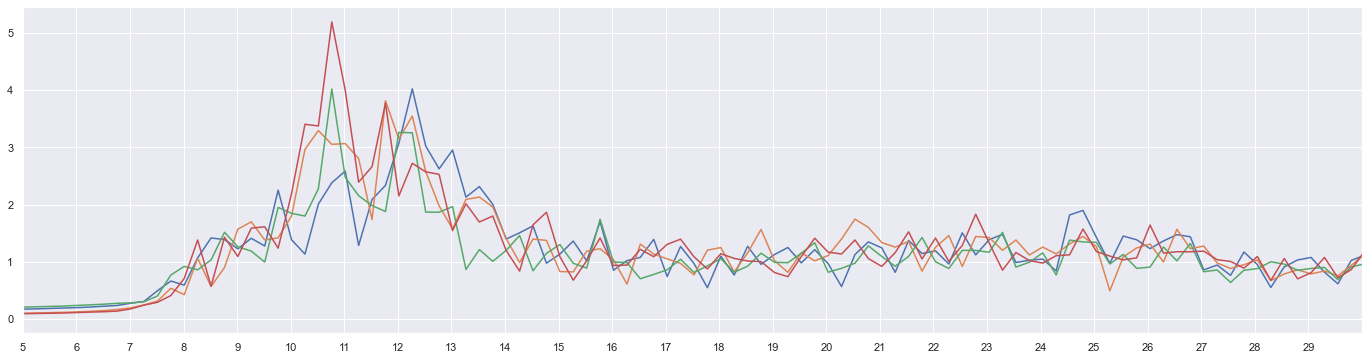

In [92]:
plt.figure(figsize=(24, 6))
ax = plt.subplot()
ax.set_xlim(5, 30)
sns.lineplot(x=freqs, y=psd[8,4,:], ax=ax)
sns.lineplot(x=freqs, y=psd[9,4,:], ax=ax)
sns.lineplot(x=freqs, y=psd[10,4,:], ax=ax)
sns.lineplot(x=freqs, y=psd[11,4,:], ax=ax)
plt.xticks(range(5,30));

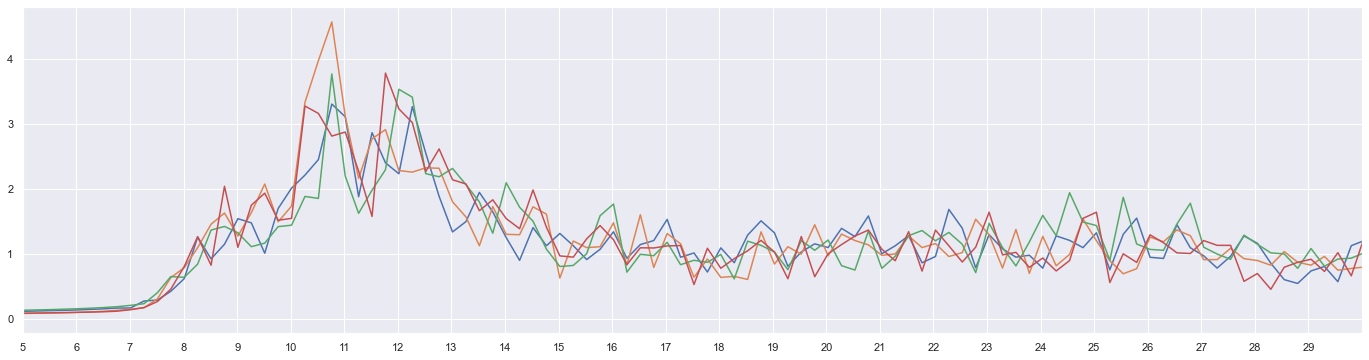

In [93]:
plt.figure(figsize=(24, 6))
ax = plt.subplot()
ax.set_xlim(5, 30)
sns.lineplot(x=freqs, y=psd[12,4,:], ax=ax)
sns.lineplot(x=freqs, y=psd[13,4,:], ax=ax)
sns.lineplot(x=freqs, y=psd[14,4,:], ax=ax)
sns.lineplot(x=freqs, y=psd[15,4,:], ax=ax)
plt.xticks(range(5,30));

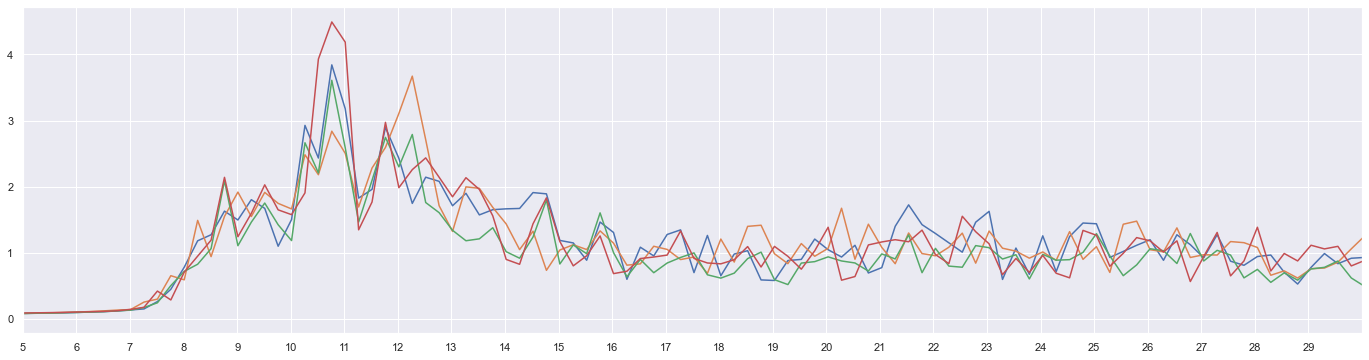

In [94]:
plt.figure(figsize=(24, 6))
ax = plt.subplot()
ax.set_xlim(5, 30)
sns.lineplot(x=freqs, y=psd[16,4,:], ax=ax)
sns.lineplot(x=freqs, y=psd[17,4,:], ax=ax)
sns.lineplot(x=freqs, y=psd[18,4,:], ax=ax)
sns.lineplot(x=freqs, y=psd[19,4,:], ax=ax)
plt.xticks(range(5,30));

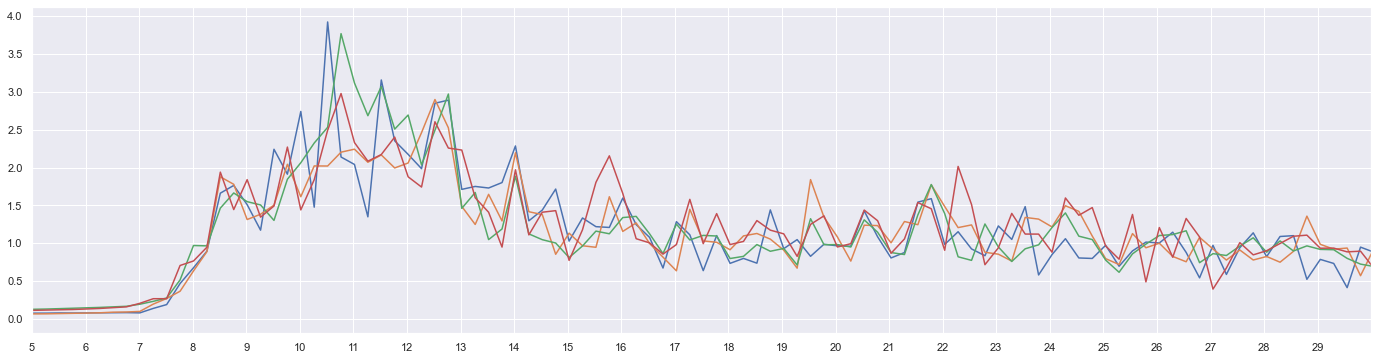

In [89]:
plt.figure(figsize=(24, 6))
ax = plt.subplot()
ax.set_xlim(5, 30)
sns.lineplot(x=freqs, y=psd[20,3,:], ax=ax)
sns.lineplot(x=freqs, y=psd[21,3,:], ax=ax)
sns.lineplot(x=freqs, y=psd[22,3,:], ax=ax)
sns.lineplot(x=freqs, y=psd[23,3,:], ax=ax)
plt.xticks(range(5,30));

In [38]:
montage = mne.channels.make_standard_montage('standard_1020')
channels = ['Pz', 'F4', 'C4', 'P4', 'P3', 'C3', 'F3']
info = mne.create_info(ch_names=channels, sfreq=300, ch_types=['eeg'] * 7)